# Narrative Memory API Demonstration

This notebook demonstrates the capabilities of the fine-tuned Sparse Autoencoder (SAE) via the `NarrativeMemoryAPI`. We will explore how to retrieve narratives based on the activation of specific neurons that have learned interpretable roles related to narrative features like emotional intensity, structural complexity, and external chaos.

**Key Model Used:** `sae_text_finetuned.pth` (Fine-tuned with `BETA_L1=0.001`, `LR=5e-5`)
**Key Dataset Used:** `processed_batches/results_batch_68132475ee8481908e4db8b9c4605c0c.json`

In [1]:
# Import the API class (assuming narrative_memory_api.py is in the same directory or Python path)
# If it's in a different folder, adjust the import path accordingly (e.g., from src.api import NarrativeMemoryAPI)
try:
    from narrative_memory_api import NarrativeMemoryAPI
except ImportError:
    print("Error: Could not import NarrativeMemoryAPI.")
    print("Please ensure 'narrative_memory_api.py' is accessible.")
    # Add fallback or exit logic if necessary
    assert False, "API import failed."

import torch  # For tensor operations if needed later
import numpy as np  # For array operations if needed later
import matplotlib.pyplot as plt  # For potential visualizations

# Instantiate the API - this will load the model, data, and compute the trace
# It will print status messages during initialization.
try:
    # Using default paths specified within the API class now
    api = NarrativeMemoryAPI()
    print("\nAPI Ready!")
except FileNotFoundError as e:
    print(f"\nInitialization Error: {e}")
    print(
        "Please ensure the required model and data files exist in the expected locations."
    )
except Exception as e:
    print(f"\nAn unexpected error occurred during API initialization: {e}")

/Users/leonvanbokhorst/sparse-memory-encoding/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


--- Initializing Narrative Memory API --- 
MPS device found. Using MPS.
Loading narrative data from: processed_batches/results_batch_68132475ee8481908e4db8b9c4605c0c.json...
Loaded 1500 narrative entries.
Loading sentence transformer: all-MiniLM-L6-v2...
Sentence transformer loaded.
Loading fine-tuned SAE model from: sae_text_finetuned.pth...
SAE Model Structure: Proj [384->300], Enc [300->30]
SAE model loaded successfully.
Computing full memory trace...
Encoding 1500 texts...


Batches: 100%|██████████| 47/47 [00:01<00:00, 30.09it/s]

Calculating activations with SAE model...
Memory trace computation complete.
API Initialized. Memory Trace shape: torch.Size([1500, 30])
-----------------------------------------

API Ready!


## Key Neuron Roles Recap

Based on our analysis (`sae_text_finetune.py` with `BETA_L1=0.001`), the following key neurons emerged with interpretable specializations for the default model (`sae_text_finetuned.pth`):

*   **Neuron 4:** Emotional Intensity / Salience / Confrontation / Loss
*   **Neuron 13:** Structured Thought / Scene Description / Planning / Complexity
*   **Neuron 27:** External Chaos / Overwhelm / Systemic Conflict / Disorder

In [5]:
# Demonstrate retrieving top memories for individual key neurons

k = 5  # Number of top narratives to retrieve

# --- Neuron 4: Emotional Intensity ---
print(f"--- Retrieving Top {k} for Neuron 4 (Emotional Intensity) ---")
indices_n4, values_n4 = api.retrieve_top_k_memories(neuron_index=4, k=k)
for i, idx_tensor in enumerate(indices_n4):
    idx = idx_tensor.item()
    text = api.get_narrative_text(idx)
    print(f"  Rank {i+1} (Activation: {values_n4[i]:.4f}) Index: {idx}")
    print(f'    Narrative: "{text}"')
print("-" * 20)

# --- Neuron 13: Structure/Scene/Planning ---
print(f"--- Retrieving Top {k} for Neuron 13 (Structure/Scene/Planning) ---")
indices_n13, values_n13 = api.retrieve_top_k_memories(neuron_index=13, k=k)
for i, idx_tensor in enumerate(indices_n13):
    idx = idx_tensor.item()
    text = api.get_narrative_text(idx)
    print(f"  Rank {i+1} (Activation: {values_n13[i]:.4f}) Index: {idx}")
    print(f'    Narrative: "{text}"')
print("-" * 20)

# --- Neuron 27: External Chaos/Overwhelm ---
print(f"--- Retrieving Top {k} for Neuron 27 (External Chaos/Overwhelm) ---")
indices_n27, values_n27 = api.retrieve_top_k_memories(neuron_index=27, k=k)
for i, idx_tensor in enumerate(indices_n27):
    idx = idx_tensor.item()
    text = api.get_narrative_text(idx)
    print(f"  Rank {i+1} (Activation: {values_n27[i]:.4f}) Index: {idx}")
    print(f'    Narrative: "{text}"')
print("-" * 20)

--- Retrieving Top 5 for Neuron 4 (Emotional Intensity) ---

Retrieving top 5 for Neuron 4...
  Rank 1 (Activation: 1.4758) Index: 311
    Narrative: "She quietly resolved to write a heartfelt letter to her estranged father, daring to reveal her deepest feelings for the first time."
  Rank 2 (Activation: 1.4647) Index: 754
    Narrative: "As the overloaded traffic controller desperately waved his arms amidst a swarm of malfunctioning drones and swirling fog, he shouted, "Just keep flying! Nothing's following the rules anymore!"
  Rank 3 (Activation: 1.4618) Index: 401
    Narrative: "As she watched her childhood home burn to the ground, he whispered softly, "None of this was your fault," tears streaming down his face."
  Rank 4 (Activation: 1.4500) Index: 114
    Narrative: "As she clutched the crumpled letter, her trembling voice begged him to stay, her eyes silently pleading for the love she feared was slipping away."
  Rank 5 (Activation: 1.4332) Index: 384
    Narrative: "She clenc

## 3. Composite Retrieval: Nuanced Queries

Now we demonstrate the more sophisticated composite queries using the API methods.

In [6]:
# Demonstrate the high-level composite query methods

k = 5  # Number of top narratives to retrieve


def print_composite_results(description, indices, scores, show_activations=None):
    """Helper function to print composite results nicely."""
    print(f"--- {description} (Top {len(indices)}) ---")
    if indices.numel() == 0:
        print("  (No results found for this query)")
        return

    for i, idx_tensor in enumerate(indices):
        idx = idx_tensor.item()
        text = api.get_narrative_text(idx)
        score = scores[i].item()
        print(f"  Rank {i+1} (Score: {score:.4f}) Index: {idx}")
        if show_activations:
            activations = api.get_activations([idx])[
                0
            ]  # Get activations for this index
            acts_str = ", ".join(
                [f"N{n}: {activations[n]:.3f}" for n in show_activations]
            )
            print(f"    Activations: [{acts_str}]")
        print(f'    Narrative: "{text}"')
    print("-" * 20)


# --- Query 1: Intensity without Chaos ---
indices, scores = api.retrieve_intensity_without_chaos(k=k)
print_composite_results(
    "Intensity without Chaos (High N4 / Low N27)",
    indices,
    scores,
    show_activations=[4, 27],
)

# --- Query 2: Structure in Chaos ---
indices, scores = api.retrieve_structure_in_chaos(k=k)
print_composite_results(
    "Structure in Chaos (High N13 & N27)", indices, scores, show_activations=[13, 27]
)

# --- Query 3: Routine Structure Focus ---
indices, scores = api.retrieve_routine_structure(k=k)
print_composite_results(
    "Routine Structure (High N13 / Low N4 & N27)",
    indices,
    scores,
    show_activations=[4, 13, 27],
)


Retrieving top 5 for Intensity without Chaos (High N4 / Low N27)...

Retrieving top 5 composite: Pos=[4], Neg=[27]...
--- Intensity without Chaos (High N4 / Low N27) (Top 5) ---
  Rank 1 (Score: 1.2039) Index: 401
    Activations: [N4: 1.462, N27: 0.258]
    Narrative: "As she watched her childhood home burn to the ground, he whispered softly, "None of this was your fault," tears streaming down his face."
  Rank 2 (Score: 1.1958) Index: 114
    Activations: [N4: 1.450, N27: 0.254]
    Narrative: "As she clutched the crumpled letter, her trembling voice begged him to stay, her eyes silently pleading for the love she feared was slipping away."
  Rank 3 (Score: 1.1879) Index: 384
    Activations: [N4: 1.433, N27: 0.245]
    Narrative: "She clenched her fists, silently promising herself she would confront her estranged father at the reunion, determined to finally seek closure."
  Rank 4 (Score: 1.1571) Index: 311
    Activations: [N4: 1.476, N27: 0.319]
    Narrative: "She quietly resolve

## 4. Visualization using API Data

We can fetch the memory trace directly from the API object and use it for visualization, similar to our previous analysis script.


Retrieving top 1 for Intensity without Chaos (High N4 / Low N27)...

Retrieving top 1 composite: Pos=[4], Neg=[27]...

Retrieving top 1 for Structure in Chaos (High N13 & N27)...

Retrieving top 1 composite: Pos=[13, 27], Neg=[]...

Retrieving top 1 for Routine Structure (High N13 / Low N4 & N27)...

Retrieving top 1 composite: Pos=[13], Neg=[4, 27]...


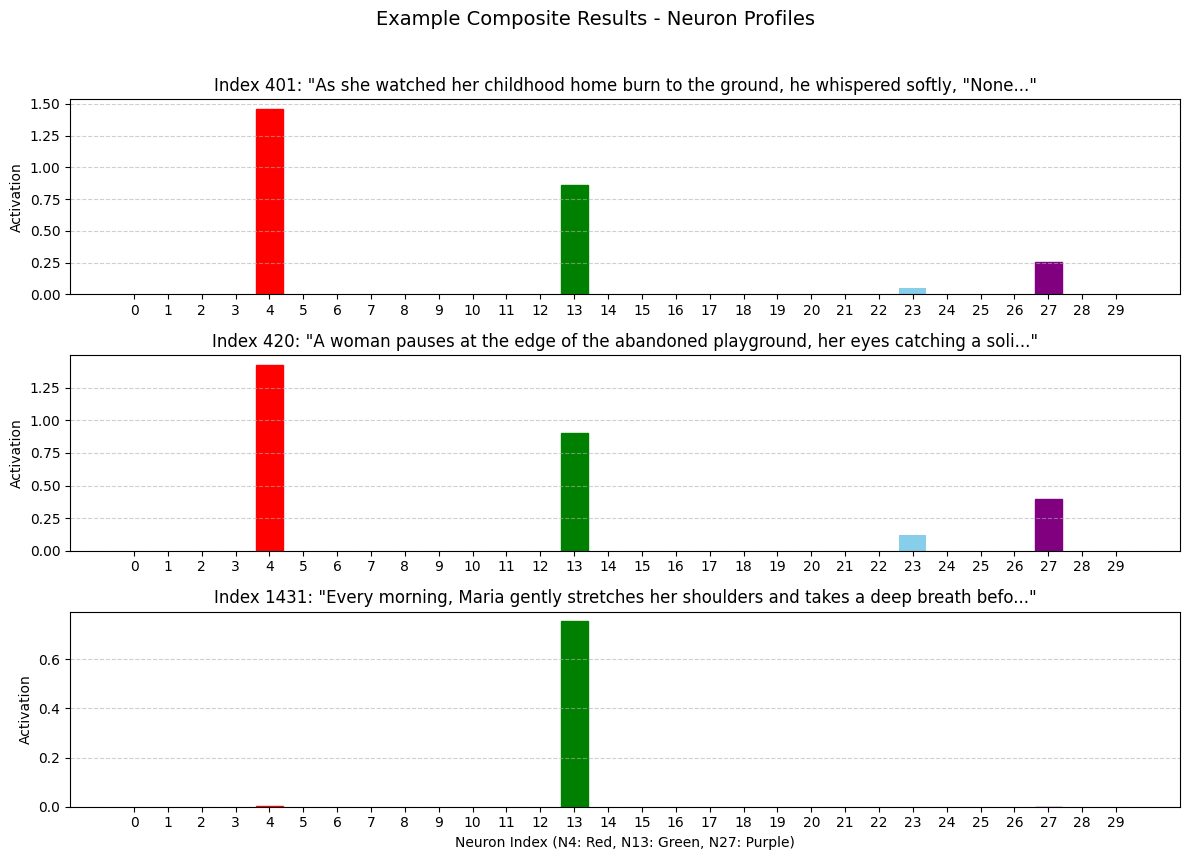

In [7]:
# Optional: Visualize activations for specific retrieved narratives


def plot_activations(indices_to_plot, title_prefix="Activations"):
    """Helper to plot activation profiles for a few narratives."""
    if not isinstance(indices_to_plot, list):
        indices_to_plot = [indices_to_plot]  # Ensure it's a list

    if not indices_to_plot:
        print("No indices provided for plotting.")
        return

    activations = api.get_activations(indices_to_plot)
    if activations is None:
        print("Could not retrieve activations.")
        return

    num_plots = activations.shape[0]
    num_neurons = api.compressed_size

    fig, axes = plt.subplots(num_plots, 1, figsize=(12, 3 * num_plots), squeeze=False)
    fig.suptitle(f"{title_prefix} - Neuron Profiles", fontsize=14)

    neuron_indices = np.arange(num_neurons)

    for i in range(num_plots):
        idx = indices_to_plot[i]
        acts = activations[i].numpy()  # Convert tensor row to numpy
        text_snippet = api.get_narrative_text(idx)[:80] + "..."  # Get text snippet

        ax = axes[i, 0]
        ax.bar(neuron_indices, acts, color="skyblue")
        # Highlight key neurons
        if 4 < num_neurons:
            ax.patches[4].set_color("red")
        if 13 < num_neurons:
            ax.patches[13].set_color("green")
        if 27 < num_neurons:
            ax.patches[27].set_color("purple")

        ax.set_title(f'Index {idx}: "{text_snippet}"')
        ax.set_ylabel("Activation")
        ax.set_xticks(neuron_indices)
        ax.set_xticklabels(neuron_indices)
        ax.grid(axis="y", linestyle="--", alpha=0.6)

    axes[-1, 0].set_xlabel("Neuron Index (N4: Red, N13: Green, N27: Purple)")
    plt.tight_layout(rect=[0, 0.03, 1, 0.96])  # Adjust layout to prevent title overlap
    plt.show()


# --- Select a few indices from the previous cell's output to visualize ---
# Example: Visualize one result from each composite query
try:
    # Get the top result index from each query (ensure the variables exist)
    idx_intensity_no_chaos = api.retrieve_intensity_without_chaos(k=1)[0][0].item()
    idx_structure_in_chaos = api.retrieve_structure_in_chaos(k=1)[0][0].item()
    idx_routine_structure = api.retrieve_routine_structure(k=1)[0][0].item()

    indices_for_vis = [
        idx_intensity_no_chaos,
        idx_structure_in_chaos,
        idx_routine_structure,
    ]
    plot_activations(indices_for_vis, title_prefix="Example Composite Results")

except NameError:
    print("Could not find indices from previous cell, skipping visualization.")
except IndexError:
    print("Not enough results from previous queries to visualize, skipping.")
except Exception as e:
    print(f"An error occurred during visualization: {e}")

## Conclusion

This notebook demonstrated the enhanced `NarrativeMemoryAPI` leveraging a fine-tuned SAE with interpretable neuron roles.

We observed:
- Individual neurons specializing in concepts like Emotional Intensity (N4), Structure/Planning (N13), and External Chaos (N27).
- Successful retrieval of specific narrative types using composite queries that combine these neuron activations.
- The potential for using these sparse, interpretable representations for nuanced narrative understanding and retrieval.

Further steps could include more sophisticated query combinations, human evaluation of retrieval relevance, and integration into larger narrative processing systems.